本章主要内容为数据读取和数据分析，具体使用Pandas库完成数据读取操作，并对赛题数据进行分析构成。

学习目标
- 学习使用Pandas读取赛题数据
- 分析赛题数据的分布规律

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# 相关全局设置
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)

# 数据读取

In [3]:
train_df = pd.read_csv('../data/train_set.csv', sep='\t', nrows=100)

In [4]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


# 数据分析

## 句子长度分析

In [5]:
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

count     100.000000
mean      872.320000
std       923.138191
min        64.000000
25%       359.500000
50%       598.000000
75%      1058.000000
max      7125.000000
Name: text_len, dtype: float64


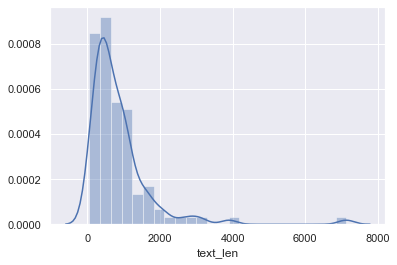

In [9]:
sns.distplot(train_df['text_len'])

本次赛题给定的文本比较长，每个句子平均由907个字符构成，最短的句子长度为64，最长的句子长度为57921。

下图将句子长度绘制了直方图，可见大部分句子的长度都在2000以内。

## 字符分布统计

In [13]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

In [14]:
word_count

[('3750', 3702),
 ('648', 2423),
 ('900', 1602),
 ('3370', 980),
 ('4464', 816),
 ('6122', 790),
 ('4939', 724),
 ('7399', 686),
 ('3659', 614),
 ('669', 579),
 ('4811', 564),
 ('5598', 537),
 ('5560', 507),
 ('2400', 477),
 ('2109', 469),
 ('1699', 449),
 ('803', 442),
 ('1635', 441),
 ('299', 434),
 ('2465', 420),
 ('1519', 399),
 ('5998', 387),
 ('4893', 378),
 ('4411', 371),
 ('1903', 365),
 ('5620', 355),
 ('5445', 352),
 ('5948', 339),
 ('2555', 322),
 ('3800', 317),
 ('6065', 310),
 ('1460', 299),
 ('1324', 296),
 ('3915', 295),
 ('2210', 295),
 ('7539', 294),
 ('4659', 292),
 ('4128', 285),
 ('340', 281),
 ('1375', 280),
 ('2376', 278),
 ('307', 278),
 ('465', 275),
 ('1465', 273),
 ('5602', 272),
 ('7543', 272),
 ('5977', 271),
 ('1985', 271),
 ('2614', 270),
 ('2252', 270),
 ('3700', 268),
 ('4269', 267),
 ('6093', 262),
 ('1667', 257),
 ('2799', 252),
 ('3223', 250),
 ('5393', 249),
 ('6017', 247),
 ('5410', 243),
 ('4853', 242),
 ('619', 239),
 ('7194', 237),
 ('4704', 231)

接下来可以统计每个字符出现的次数，首先可以将训练集中所有的句子进行拼接进而划分为字符，并统计每个字符的个数。

从统计结果中可以看出，在训练集中总共包括6869个字，其中编号3750的字出现的次数最多，编号3133的字出现的次数最少。

## label分析

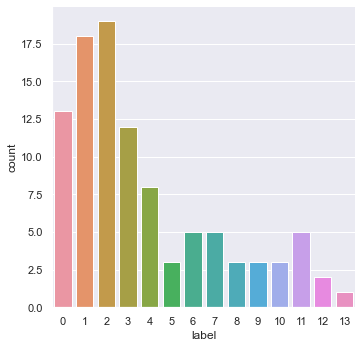

In [12]:
sns.catplot(x='label',kind='count',data=train_df)

在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

# 总结

1. 每个新闻平均字符个数较多，可能需要截断；
2. 由于类别不均衡，会严重影响模型的精度；